In [1]:
# Import libraries
import numpy as np
import pandas as pd
import pyhf
import matplotlib.pyplot as plt

In [2]:
nominal_eps = 1e-3
scaling = 0.05
fraction_outside = 1.1

# Target POT
target_pot_run1 = 2.38e20
target_pot_run3 = 5.18e20

# Masses to loop over
masses = ["0.01", "0.02", "0.03", "0.04", "0.05", "0.06", "0.07", "0.08", "0.09", "0.1", "0.2", "0.3", "0.4"]

# Meson scalings
meson_scalings = {"pi0": 11.7, "eta": 7.2}

# Correction factors
correction_dic_a = {
    "pi0": {'0.01': 11.198, '0.02': 11.145, '0.03': 10.861, '0.04': 11.543, '0.05': 10.671, 
            '0.06': 10.098, '0.07': 8.741, '0.08': 10.282, '0.09': 9.333},
    "eta": {'0.02': 10.555, '0.03': 9.759, '0.04': 7.934, '0.05': 9.387, '0.06': 9.863, 
            '0.07': 10.301, '0.08': 9.141, '0.09': 7.273, '0.1': 7.228, '0.2': 7.597, 
            '0.3': 5.219, '0.4': 4.498}
}

# Uncertainties
pot_uncert = 0.02  # 2% POT uncertainty
flux_uncert = 0.22  # 22% flux uncertainty
detvar_uncert = 0.18  # 18% detector variation uncertainty

# Cross-section uncertainties (%) 
run1_xsec_uncert_a = {
    "pi0": {"0.01": 1.16, "0.02": 2.27, "0.03": 3.48, "0.04": 4.48, "0.05": 5.50, 
            "0.06": 5.92, "0.07": 7.17, "0.08": 8.55, "0.09": 8.97},
    "eta": {"0.02": 2.09, "0.03": 3.50, "0.04": 4.33, "0.05": 6.07, "0.06": 6.26, 
            "0.07": 7.45, "0.08": 8.72, "0.09": 8.99, "0.1": 9.63, "0.2": 18.95, 
            "0.3": 22.04, "0.4": 30.34}
}

run3_xsec_uncert_a = {
    "pi0": {"0.01": 0.92, "0.02": 2.32, "0.03": 2.82, "0.04": 4.32, "0.05": 5.24, 
            "0.06": 5.93, "0.07": 6.44, "0.08": 8.94, "0.09": 7.84},
    "eta": {"0.02": 2.15, "0.03": 3.24, "0.04": 4.14, "0.05": 5.41, "0.06": 7.17, 
            "0.07": 6.41, "0.08": 7.87, "0.09": 8.32, "0.1": 9.22, "0.2": 15.78, 
            "0.3": 20.14, "0.4": 23.64}
}

# total_pot values
total_pot = {
    "run1_dt_ratio_0.6_ma_0.01_pi0": 3.583299e+20,
    "run1_dt_ratio_0.6_ma_0.02_eta": 1.971339e+22,
    "run1_dt_ratio_0.6_ma_0.02_pi0": 3.785739e+21,
    "run1_dt_ratio_0.6_ma_0.03_eta": 6.018737e+22,
    "run1_dt_ratio_0.6_ma_0.03_pi0": 1.403744e+22,
    "run1_dt_ratio_0.6_ma_0.04_eta": 2.797252e+23,
    "run1_dt_ratio_0.6_ma_0.04_pi0": 6.144923e+22,
    "run1_dt_ratio_0.6_ma_0.05_eta": 6.491310e+23,
    "run1_dt_ratio_0.6_ma_0.05_pi0": 1.594137e+23,
    "run1_dt_ratio_0.6_ma_0.06_eta": 1.333156e+24,
    "run1_dt_ratio_0.6_ma_0.06_pi0": 5.428614e+23,
    "run1_dt_ratio_0.6_ma_0.07_eta": 1.726805e+24,
    "run1_dt_ratio_0.6_ma_0.07_pi0": 2.122624e+24,
    "run1_dt_ratio_0.6_ma_0.08_eta": 3.721201e+24,
    "run1_dt_ratio_0.6_ma_0.08_pi0": 9.137349e+24,
    "run1_dt_ratio_0.6_ma_0.09_eta": 6.937703e+24,
    "run1_dt_ratio_0.6_ma_0.09_pi0": 4.752829e+25,
    "run1_dt_ratio_0.6_ma_0.1_eta": 2.632356e+25,
    "run1_dt_ratio_0.6_ma_0.2_eta": 2.642929e+27,
    "run1_dt_ratio_0.6_ma_0.3_eta": 4.548050e+29,
    "run1_dt_ratio_0.6_ma_0.4_eta": 2.856632e+32,
    "run3_dt_ratio_0.6_ma_0.01_pi0": 7.825758e+20,
    "run3_dt_ratio_0.6_ma_0.02_eta": 2.618067e+22,
    "run3_dt_ratio_0.6_ma_0.02_pi0": 3.553433e+21,
    "run3_dt_ratio_0.6_ma_0.03_eta": 1.076195e+23,
    "run3_dt_ratio_0.6_ma_0.03_pi0": 1.590684e+22,
    "run3_dt_ratio_0.6_ma_0.04_eta": 3.182032e+23,
    "run3_dt_ratio_0.6_ma_0.04_pi0": 6.326536e+22,
    "run3_dt_ratio_0.6_ma_0.05_eta": 1.458703e+24,
    "run3_dt_ratio_0.6_ma_0.05_pi0": 3.951992e+23,
    "run3_dt_ratio_0.6_ma_0.06_eta": 1.106334e+24,
    "run3_dt_ratio_0.6_ma_0.06_pi0": 8.377697e+23,
    "run3_dt_ratio_0.6_ma_0.07_eta": 3.539695e+24,
    "run3_dt_ratio_0.6_ma_0.07_pi0": 2.825310e+24,
    "run3_dt_ratio_0.6_ma_0.08_eta": 4.752001e+24,
    "run3_dt_ratio_0.6_ma_0.08_pi0": 1.088737e+25,
    "run3_dt_ratio_0.6_ma_0.09_eta": 8.286352e+24,
    "run3_dt_ratio_0.6_ma_0.09_pi0": 7.609472e+25,
    "run3_dt_ratio_0.6_ma_0.1_eta": 1.655501e+25,
    "run3_dt_ratio_0.6_ma_0.2_eta": 2.472610e+27,
    "run3_dt_ratio_0.6_ma_0.3_eta": 2.116252e+29,
    "run3_dt_ratio_0.6_ma_0.4_eta": 3.486213e+32,
}

# Background scalings Background POT
scalings_run1 = {"nu": 1.0/2.35e21, "dirt": 1.026*0.75/1.6e21, "beamoff": 0.98*(5736147/9186361.390000)}
scalings_run3 = {"nu": 1.0/1.993661e21, "dirt": 1.0*0.35/1.020e21, "beamoff": 0.98*(10385459.0/34147459.925000)}

In [3]:
# Directories
base_dir_run1 = "/home/hep/an1522/dark_tridents_wspace/outputs/inference/run1_samples/"
base_dir_run3 = "/home/hep/an1522/dark_tridents_wspace/outputs/inference/run3_samples/"
signal_dir_run1 = "/home/hep/an1522/dark_tridents_wspace/outputs/inference/run1_signal/"
signal_dir_run3 = "/home/hep/an1522/dark_tridents_wspace/outputs/inference/run3_signal/"

# Background
df_nu_run1 = pd.read_csv(base_dir_run1 + "run1_nu_overlay_merged_with_weights.csv").drop_duplicates()
df_nu_run3 = pd.read_csv(base_dir_run3 + "run3_nu_overlay_merged_with_weights.csv").drop_duplicates()
df_dirt_run1 = pd.read_csv(base_dir_run1 + "run1_dirt_merged_with_weights.csv").drop_duplicates()
df_dirt_run3 = pd.read_csv(base_dir_run3 + "run3_dirt_merged_with_weights.csv").drop_duplicates()
df_offbeam_run1 = pd.read_csv(base_dir_run1 + "run1_offbeam_larcv_cropped_full_set_scores.csv").drop_duplicates()
df_offbeam_run3 = pd.read_csv(base_dir_run3 + "run3_offbeam_larcv_cropped_scores.csv").drop_duplicates()

print(f"Run 1 backgrounds: Nu - {len(df_nu_run1)}, Dirt - {len(df_dirt_run1)}, Offbeam - {len(df_offbeam_run1)}")
print(f"Run 3 backgrounds: Nu - {len(df_nu_run3)}, Dirt - {len(df_dirt_run3)}, Offbeam - {len(df_offbeam_run3)}")

Run 1 backgrounds - Nu: 13770, Dirt: 3304, Offbeam: 3889
Run 3 backgrounds - Nu: 11526, Dirt: 2413, Offbeam: 15479


In [4]:
bins = np.linspace(0.5, 1.0, 11)

# Background scalings
nu_scaling_run1 = target_pot_run1 * scalings_run1["nu"]
nu_scaling_run3 = target_pot_run3 * scalings_run3["nu"]
dirt_scaling_run1 = target_pot_run1 * scalings_run1["dirt"]
dirt_scaling_run3 = target_pot_run3 * scalings_run3["dirt"]
offbeam_scaling_run1 = scalings_run1["beamoff"]
offbeam_scaling_run3 = scalings_run3["beamoff"]

# Background histograms
hist_nu_run1, _ = np.histogram(df_nu_run1['signal_score'], bins=bins, weights=df_nu_run1['weight'])
hist_nu_run3, _ = np.histogram(df_nu_run3['signal_score'], bins=bins, weights=df_nu_run3['weight'])
hist_dirt_run1, _ = np.histogram(df_dirt_run1['signal_score'], bins=bins, weights=df_dirt_run1['weight'])
hist_dirt_run3, _ = np.histogram(df_dirt_run3['signal_score'], bins=bins, weights=df_dirt_run3['weight'])
hist_offbeam_run1, _ = np.histogram(df_offbeam_run1['signal_score'], bins=bins)
hist_offbeam_run3, _ = np.histogram(df_offbeam_run3['signal_score'], bins=bins)

# Apply scalings
hist_nu_run1 = hist_nu_run1 * nu_scaling_run1
hist_nu_run3 = hist_nu_run3 * nu_scaling_run3
hist_dirt_run1 = hist_dirt_run1 * dirt_scaling_run1
hist_dirt_run3 = hist_dirt_run3 * dirt_scaling_run3
hist_offbeam_run1 = hist_offbeam_run1 * offbeam_scaling_run1
hist_offbeam_run3 = hist_offbeam_run3 * offbeam_scaling_run3

hist_bkg_run1 = hist_nu_run1 + hist_dirt_run1 + hist_offbeam_run1
hist_bkg_run3 = hist_nu_run3 + hist_dirt_run3 + hist_offbeam_run3

n_bkg = hist_bkg_run1.tolist() + hist_bkg_run3.tolist()
n_data = n_bkg.copy()

# Background uncertainties (statistical only for now)
bkg_uncert_run1 = np.sqrt(hist_bkg_run1)
bkg_uncert_run3 = np.sqrt(hist_bkg_run3)
# Ensure no zeros
bkg_uncert_run1 = np.maximum(bkg_uncert_run1, 0.01 * hist_bkg_run1 + 0.001)
bkg_uncert_run3 = np.maximum(bkg_uncert_run3, 0.01 * hist_bkg_run3 + 0.001)
sigma_bkg = bkg_uncert_run1.tolist() + bkg_uncert_run3.tolist()

total_bkg_run1 = np.sum(hist_bkg_run1)
total_bkg_run3 = np.sum(hist_bkg_run3)

print(f"Background Run1: {total_bkg_run1:.2f}")
print(f"Background Run3: {total_bkg_run3:.2f}")
print(f"Background Total: {sum(n_bkg):.2f}")

Background Run1: 76.28
Background Run3: 173.02
Background Total: 249.30


In [5]:
def get_signal_scaling(run, mass, dmode):
    """Calculate signal scaling for a given run, mass, and decay mode."""
    key = f"{run}_dt_ratio_0.6_ma_{mass}_{dmode}"
    pot = total_pot[key]
    target = target_pot_run1 if run == "run1" else target_pot_run3
    
    # Base scaling: meson_scaling * target_pot / total_pot
    scale = meson_scalings[dmode] * target * correction_dic_a[dmode][mass] / pot
    return scale

In [6]:
def load_signal_for_mass(mass):
    """Load signal for a given mass, combining pi0 and eta as needed."""
    
    hist_signal_run1 = np.zeros(len(bins) - 1)
    hist_signal_run3 = np.zeros(len(bins) - 1)
    
    # Determine which decay modes to use
    if mass == "0.01":
        decay_modes = ["pi0"]
    elif float(mass) >= 0.1:
        decay_modes = ["eta"]
    else:
        decay_modes = ["pi0", "eta"]
    
    for dmode in decay_modes:
        # Run 1
        try:
            fname_run1 = f"{signal_dir_run1}run1_dt_ratio_0.6_ma_{mass}_{dmode}_larcv_cropped_scores.csv"
            df = pd.read_csv(fname_run1).drop_duplicates()
            scale = get_signal_scaling("run1", mass, dmode)
            hist, _ = np.histogram(df['signal_score'], bins=bins)
            hist_signal_run1 += hist * scale
        except FileNotFoundError:
            print(f"  Warning: {fname_run1} not found")
        
        # Run 3
        try:
            fname_run3 = f"{signal_dir_run3}run3_dt_ratio_0.6_ma_{mass}_{dmode}_larcv_cropped_scores.csv"
            df = pd.read_csv(fname_run3).drop_duplicates()
            scale = get_signal_scaling("run3", mass, dmode)
            hist, _ = np.histogram(df['signal_score'], bins=bins)
            hist_signal_run3 += hist * scale
        except FileNotFoundError:
            print(f"  Warning: {fname_run3} not found")
    
    return hist_signal_run1, hist_signal_run3


In [7]:
# Store results
results_list = []

for mass in masses:
    print(f"\n{'='*60}")
    print(f"Processing mass: {mass}")
    print(f"{'='*60}")
    
    # Load signal for this mass
    hist_signal_run1, hist_signal_run3 = load_signal_for_mass(mass)
    
    total_sig_run1 = np.sum(hist_signal_run1)
    total_sig_run3 = np.sum(hist_signal_run3)
    
    print(f"Signal Run1: {total_sig_run1:.2f}")
    print(f"Signal Run3: {total_sig_run3:.2f}")
    
    if total_sig_run1 == 0 or total_sig_run3 == 0:
        print(f"  Skipping mass {mass} - no signal events")
        continue
    
    # Calculate cross-section uncertainty for this mass
    xsec_uncert_sq = 0
    if mass == "0.01":
        decay_modes = ["pi0"]
    elif float(mass) >= 0.1:
        decay_modes = ["eta"]
    else:
        decay_modes = ["pi0", "eta"]
    
    for dmode in decay_modes:
        if dmode in run1_xsec_uncert_a and mass in run1_xsec_uncert_a[dmode]:
            xsec_uncert_sq += run1_xsec_uncert_a[dmode][mass]**2
    
    xsec_uncert = np.sqrt(xsec_uncert_sq) / 100
    print(f"Cross-section uncertainty: {xsec_uncert:.1%}")
    
    # Combine runs
    n_sig = hist_signal_run1.tolist() + hist_signal_run3.tolist()
    
    # Luis's factor calculation
    factor = scaling * (((total_bkg_run1/total_sig_run1) + (total_bkg_run3/total_sig_run3)) / 2.)
    print(f"Scaling factor: {factor:.6e}")
    
    # Scale signal
    n_sig_scaled = [s * factor * fraction_outside for s in n_sig]
    
    # Build pyhf model with all uncertainties
    model = pyhf.Model({
        "channels": [{
            "name": "singlechannel",
            "samples": [
                {
                    "name": "signal",
                    "data": n_sig_scaled,
                    "modifiers": [
                        {"name": "mu", "type": "normfactor", "data": None},
                        {"name": "pot_uncert", "type": "normsys", "data": {"hi": 1.02, "lo": 0.98}},
                        {"name": "flux_uncert", "type": "normsys", "data": {"hi": 1.22, "lo": 0.78}},
                        {"name": "det_uncert", "type": "normsys", "data": {"hi": 1.18, "lo": 0.82}},
                        {"name": "xsec_uncert", "type": "normsys", "data": {"hi": 1 + xsec_uncert, "lo": 1 - xsec_uncert}},
                    ]
                },
                {
                    "name": "background",
                    "data": n_bkg,
                    "modifiers": [
                        {"name": "pot_uncert", "type": "normsys", "data": {"hi": 1.02, "lo": 0.98}},
                    ]
                }
            ]
        }]
    })
    
    # Calculate limit
    poi_values = np.linspace(0., 10., 100)
    try:
        obs = n_data + model.config.auxdata
        obs_limit, exp_limits, (scan, res) = pyhf.infer.intervals.upper_limits.upper_limit(
            obs, model, poi_values, level=0.1, return_results=True
        )
        
        # Convert to epsilon^2
        obs_epsilon = (nominal_eps**2) * np.sqrt(obs_limit * factor)
        exp_epsilon = (nominal_eps**2) * np.sqrt(exp_limits[2] * factor)
        
        print(f"Upper limit (obs): μ = {obs_limit:.4f}")
        print(f"Upper limit (obs): ε² = {obs_epsilon:.2e}")
        
        results_list.append({
            'mass': float(mass),
            'mu_obs': obs_limit,
            'mu_exp': exp_limits[2],
            'epsilon_squared_obs': obs_epsilon,
            'epsilon_squared_exp': exp_epsilon,
            'factor': factor
        })
        
    except Exception as e:
        print(f"  Error for mass {mass}: {e}")

print(f"\n{'='*60}")
print("DONE!")
print(f"{'='*60}")


Processing mass: 0.01
Signal Run1: 305266.97
Signal Run3: 642003.54
Cross-section uncertainty: 1.2%
Scaling factor: 1.298426e-05
Upper limit (obs): μ = 1.7414
Upper limit (obs): ε² = 4.76e-09

Processing mass: 0.02
Signal Run1: 43225.18
Signal Run3: 103425.18
Cross-section uncertainty: 3.1%
Scaling factor: 8.593864e-05
Upper limit (obs): μ = 1.6607
Upper limit (obs): ε² = 1.19e-08

Processing mass: 0.03
Signal Run1: 8185.50
Signal Run3: 23242.31
Cross-section uncertainty: 4.9%
Scaling factor: 4.190688e-04
Upper limit (obs): μ = 1.5624
Upper limit (obs): ε² = 2.56e-08

Processing mass: 0.04
Signal Run1: 2414.42
Signal Run3: 5825.71
Cross-section uncertainty: 6.2%
Scaling factor: 1.532291e-03
Upper limit (obs): μ = 1.6250
Upper limit (obs): ε² = 4.99e-08

Processing mass: 0.05
Signal Run1: 729.90
Signal Run3: 1844.70
Cross-section uncertainty: 8.2%
Scaling factor: 4.957419e-03
Upper limit (obs): μ = 1.6074
Upper limit (obs): ε² = 8.93e-08

Processing mass: 0.06
Signal Run1: 227.00
Signa

In [8]:
# Create dataframe and save
df_results = pd.DataFrame(results_list)
df_results = df_results.sort_values('mass')
print(df_results)# Build pyhf model (with POT uncertainty only)

# Save to CSV
#df_results.to_csv("/home/hep/an1522/dark_tridents_wspace/outputs/pyhf_limits/sensitivity_results.csv", index=False)
#print("\nSaved to sensitivity_results.csv")

    mass               mu_obs               mu_exp  epsilon_squared_obs  \
0   0.01    1.741403567971634    1.741403567971634         4.755085e-09   
1   0.02   1.6606906686720575   1.6606906686720575         1.194644e-08   
2   0.03   1.5624437606293602   1.5624437606293602         2.558850e-08   
3   0.04   1.6250423167482424   1.6250423167482424         4.990028e-08   
4   0.05   1.6074279556675128   1.6074279556675128         8.926754e-08   
5   0.06   1.6624642695451142   1.6624642695451142         1.667580e-07   
6   0.07    1.686124685566156    1.686124685566156         3.185483e-07   
7   0.08   1.6575860824349635   1.6575860824349635         5.140257e-07   
8   0.09   1.6396901775194743   1.6396901775194743         9.085424e-07   
9   0.10     1.68063836737401     1.68063836737401         1.416790e-06   
10  0.20   1.8550792962235232   1.8550792962235232         1.923856e-05   
11  0.30    2.009122284293999    2.009122284293999         2.434949e-04   
12  0.40  0.0918974839098

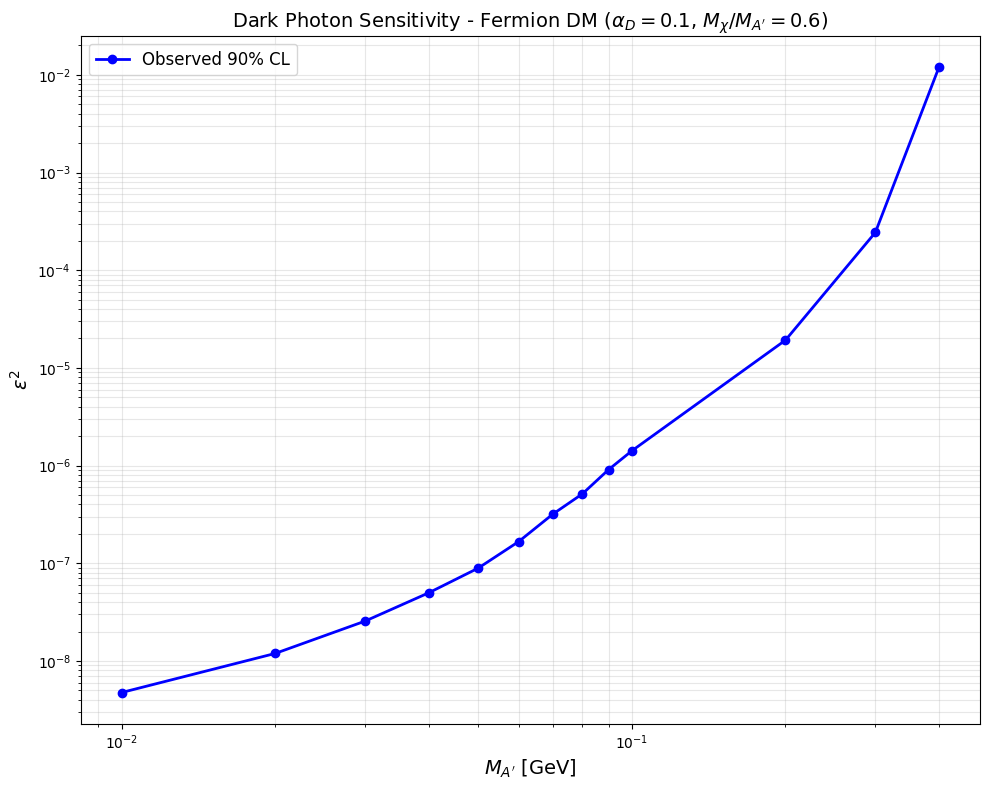

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(df_results['mass'], df_results['epsilon_squared_obs'], 'b-o', lw=2, label='Observed 90% CL')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$M_{A^\prime}$ [GeV]', fontsize=14)
ax.set_ylabel(r'$\epsilon^2$', fontsize=14)
ax.set_title(r'Dark Photon Sensitivity - Fermion DM ($\alpha_D = 0.1$, $M_\chi/M_{A^\prime} = 0.6$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
#plt.savefig("/home/hep/an1522/dark_tridents_wspace/outputs/pyhf_limits/sensitivity_curve.png", dpi=300)
#plt.savefig("/home/hep/an1522/dark_tridents_wspace/outputs/pyhf_limits/sensitivity_curve.pdf")
plt.show()

/tmp/ipykernel_746199/1983999697.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


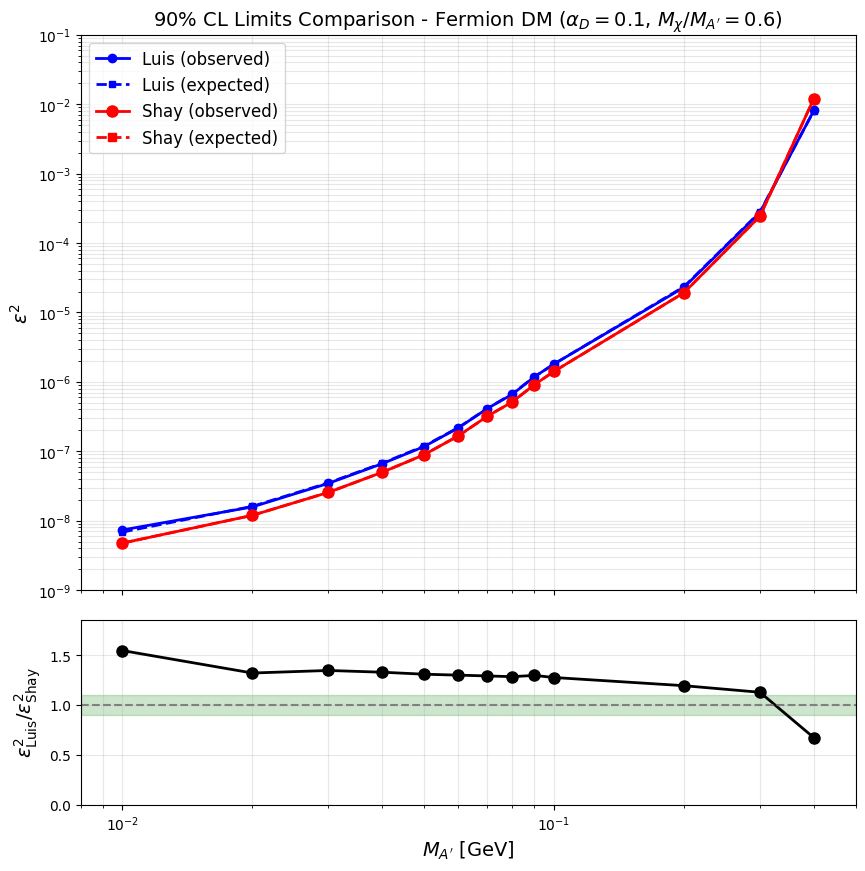

In [10]:
# Luis's values - Fermion DM, alpha_D = 0.1, M_chi/M_A' = 0.6 (Table 11.2)
luis_mass = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400])  # MeV
luis_observed = np.array([7.36e-9, 1.58e-8, 3.45e-8, 6.64e-8, 1.17e-7, 2.17e-7, 
                          4.12e-7, 6.61e-7, 1.18e-6, 1.81e-6, 2.30e-5, 2.75e-4, 8.13e-3])
luis_expected = np.array([6.86e-9, 1.61e-8, 3.51e-8, 6.74e-8, 1.19e-7, 2.19e-7,
                          4.12e-7, 6.72e-7, 1.18e-6, 1.81e-6, 2.35e-5, 2.80e-4, 8.09e-3])

luis_mass_gev = luis_mass / 1000.0

shay_mass_gev = df_results['mass'].values
shay_observed = df_results['epsilon_squared_obs'].values

# Interpolate Luis's values at your mass points for ratio
luis_interp = np.interp(shay_mass_gev, luis_mass_gev, luis_observed)
ratio = luis_interp / shay_observed

fig, ax = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 1], 'hspace': 0.08})

# Limit plots 
ax[0].plot(luis_mass_gev, luis_observed, 'b-o', lw=2, markersize=6, label='Luis (observed)')
ax[0].plot(luis_mass_gev, luis_expected, 'b--s', lw=2, markersize=5, label='Luis (expected)')
ax[0].plot(df_results['mass'], df_results['epsilon_squared_obs'], 'r-o', lw=2, markersize=8, label='Shay (observed)')
if 'epsilon_squared_exp' in df_results.columns:
    ax[0].plot(df_results['mass'], df_results['epsilon_squared_exp'], 'r--s', lw=2, markersize=6, label='Shay (expected)')

ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel(r'$\varepsilon^2$', fontsize=14)
ax[0].set_title(r'90% CL Limits Comparison - Fermion DM ($\alpha_D = 0.1$, $M_\chi/M_{A^\prime} = 0.6$)', fontsize=14)
ax[0].legend(fontsize=12)
ax[0].grid(True, alpha=0.3, which='both')
ax[0].set_xlim(0.008, 0.5)
ax[0].set_ylim(1e-9, 1e-1)
ax[0].tick_params(axis='x', labelbottom=False)

# Ratio plot
ax[1].plot(shay_mass_gev, ratio, 'ko-', lw=2, markersize=8)
ax[1].axhline(1.0, color='gray', linestyle='--', linewidth=1.5)
ax[1].fill_between([0.008, 0.5], 0.9, 1.1, color='green', alpha=0.2, label='±10%')

ax[1].set_xscale('log')
ax[1].set_xlabel(r'$M_{A^\prime}$ [GeV]', fontsize=14)
ax[1].set_ylabel(r'$\varepsilon^2_{\mathrm{Luis}} / \varepsilon^2_{\mathrm{Shay}}$', fontsize=14)
ax[1].set_xlim(0.008, 0.5)
ax[1].set_ylim(0, max(ratio) * 1.2)
ax[1].grid(True, alpha=0.3, which='both')
#plt.savefig("/home/hep/an1522/dark_tridents_wspace/outputs/pyhf_limits/sensitivity_comparison_curve.png", dpi=300)
plt.tight_layout()
plt.show()